<a href="https://colab.research.google.com/github/b-fatma/S2I-DM/blob/mybranch/src/knn/knn_2_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import pandas as pd

file_path = '/content/drive/MyDrive/dm_fire_prediction/merge/merged_v2.csv'
df = pd.read_csv(file_path)

# check first rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965257 entries, 0 to 1965256
Data columns (total 41 columns):
 #   Column           Dtype  
---  ------           -----  
 0   longitude        float64
 1   latitude         float64
 2   fire             int64  
 3   lcccode_label    float64
 4   elevation        float64
 5   COARSE           float64
 6   SAND             float64
 7   SILT             float64
 8   CLAY             float64
 9   BULK             float64
 10  REF_BULK         float64
 11  ORG_CARBON       float64
 12  PH_WATER         float64
 13  TOTAL_N          float64
 14  CN_RATIO         float64
 15  CEC_SOIL         float64
 16  CEC_CLAY         float64
 17  CEC_EFF          float64
 18  TEB              float64
 19  BSAT             float64
 20  ALUM_SAT         float64
 21  ESP              float64
 22  TCARBON_EQ       float64
 23  GYPSUM           float64
 24  ELEC_COND        float64
 25  TEXTURE_USDA     float64
 26  prec_autumn      int64  
 27  prec_spring 

In [3]:
X=df.drop(columns=['fire'])
y=df['fire']

## Undersampling

In [ ]:
!pip install imbalanced-learn


### random undersampling

((38229, 40), (38229,), np.int64(12743))

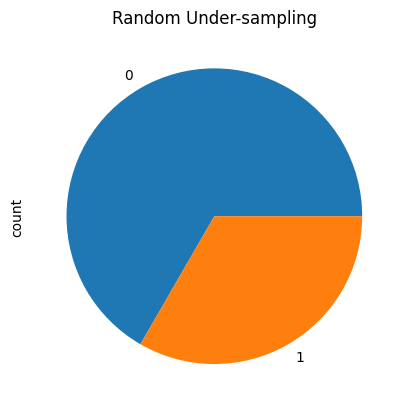

In [4]:
from imblearn.under_sampling import RandomUnderSampler
sampling_strategy = 0.5
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X,y)
ax = y_res.value_counts().plot.pie()
_ = ax.set_title("Random Under-sampling")
X_res.shape, y_res.shape, y_res.sum()



In [5]:
#save in df_balanced_ru
df = pd.concat([X_res, y_res], axis=1)
df['fire'].value_counts()

,count
fire,
0,25486
1,12743


### Cluster Centroids Undersampling

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(sampling_strategy=0.1)
X_res_c, y_res_c = cc.fit_resample(X_train, y_train)
ax = y_res_c.value_counts().plot.pie()
_ = ax.set_title("Cluster Centroids Under-sampling")
X_res_c.shape, y_res_c.shape, y_res_c.sum()



In [ ]:
test=pd.concat([X_res_c,y_res_c],axis=1)
test['fire'].value_counts()


In [ ]:
X_train.info()

In [ ]:
X_test.info()

In [ ]:
X_train=X_res
y_train=y_res

## Split Data

In [6]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop(columns=['fire'])
y = df['fire']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
y_test.value_counts()

,count
fire,
0,5083
1,2563


## Feature Engineering

### Feature Selection

#### Mutual information technique

In [8]:
X=X_train
y=y_train

#### Recursive Feature Elimination

In [ ]:
X_train.info()

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd
# rf_model = RandomForestClassifier(n_estimators=10,random_state=42)
# rfe = RFE(estimator=rf_model, n_features_to_select=17)
# rfe.fit(X, y)
# selected_features = X.columns[rfe.support_].tolist()
# print("Selected features:", selected_features)


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_

selected = X.columns[importances.argsort()[::-1][:25]]
print(selected)

Index(['longitude', 'elevation', 'latitude', 'prec_spring', 'prec_autumn',
       'prec_winter', 'tmin_summer', 'tmin_autumn', 'tmax_summer',
       'prec_summer', 'lcccode_label', 'tmax_spring', 'tmin_winter',
       'tmax_autumn', 'tmin_spring', 'tmax_winter', 'PH_WATER', 'CEC_CLAY',
       'CEC_EFF', 'TCARBON_EQ', 'CLAY', 'BULK', 'SAND', 'TEB', 'SILT'],
      dtype='object')


In [10]:
X_train = X_train[selected]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30583 entries, 1350628 to 182051
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   longitude      30583 non-null  float64
 1   elevation      30583 non-null  float64
 2   latitude       30583 non-null  float64
 3   prec_spring    30583 non-null  int64  
 4   prec_autumn    30583 non-null  int64  
 5   prec_winter    30583 non-null  int64  
 6   tmin_summer    30583 non-null  int64  
 7   tmin_autumn    30583 non-null  int64  
 8   tmax_summer    30583 non-null  int64  
 9   prec_summer    30583 non-null  int64  
 10  lcccode_label  30583 non-null  float64
 11  tmax_spring    30583 non-null  int64  
 12  tmin_winter    30583 non-null  int64  
 13  tmax_autumn    30583 non-null  int64  
 14  tmin_spring    30583 non-null  int64  
 15  tmax_winter    30583 non-null  int64  
 16  PH_WATER       30583 non-null  float64
 17  CEC_CLAY       30583 non-null  float64
 18  CEC_

In [11]:
X_train=X_train.drop(columns=['longitude','latitude'])

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30583 entries, 1350628 to 182051
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      30583 non-null  float64
 1   prec_spring    30583 non-null  int64  
 2   prec_autumn    30583 non-null  int64  
 3   prec_winter    30583 non-null  int64  
 4   tmin_summer    30583 non-null  int64  
 5   tmin_autumn    30583 non-null  int64  
 6   tmax_summer    30583 non-null  int64  
 7   prec_summer    30583 non-null  int64  
 8   lcccode_label  30583 non-null  float64
 9   tmax_spring    30583 non-null  int64  
 10  tmin_winter    30583 non-null  int64  
 11  tmax_autumn    30583 non-null  int64  
 12  tmin_spring    30583 non-null  int64  
 13  tmax_winter    30583 non-null  int64  
 14  PH_WATER       30583 non-null  float64
 15  CEC_CLAY       30583 non-null  float64
 16  CEC_EFF        30583 non-null  float64
 17  TCARBON_EQ     30583 non-null  float64
 18  CLAY

### Feature Scaling

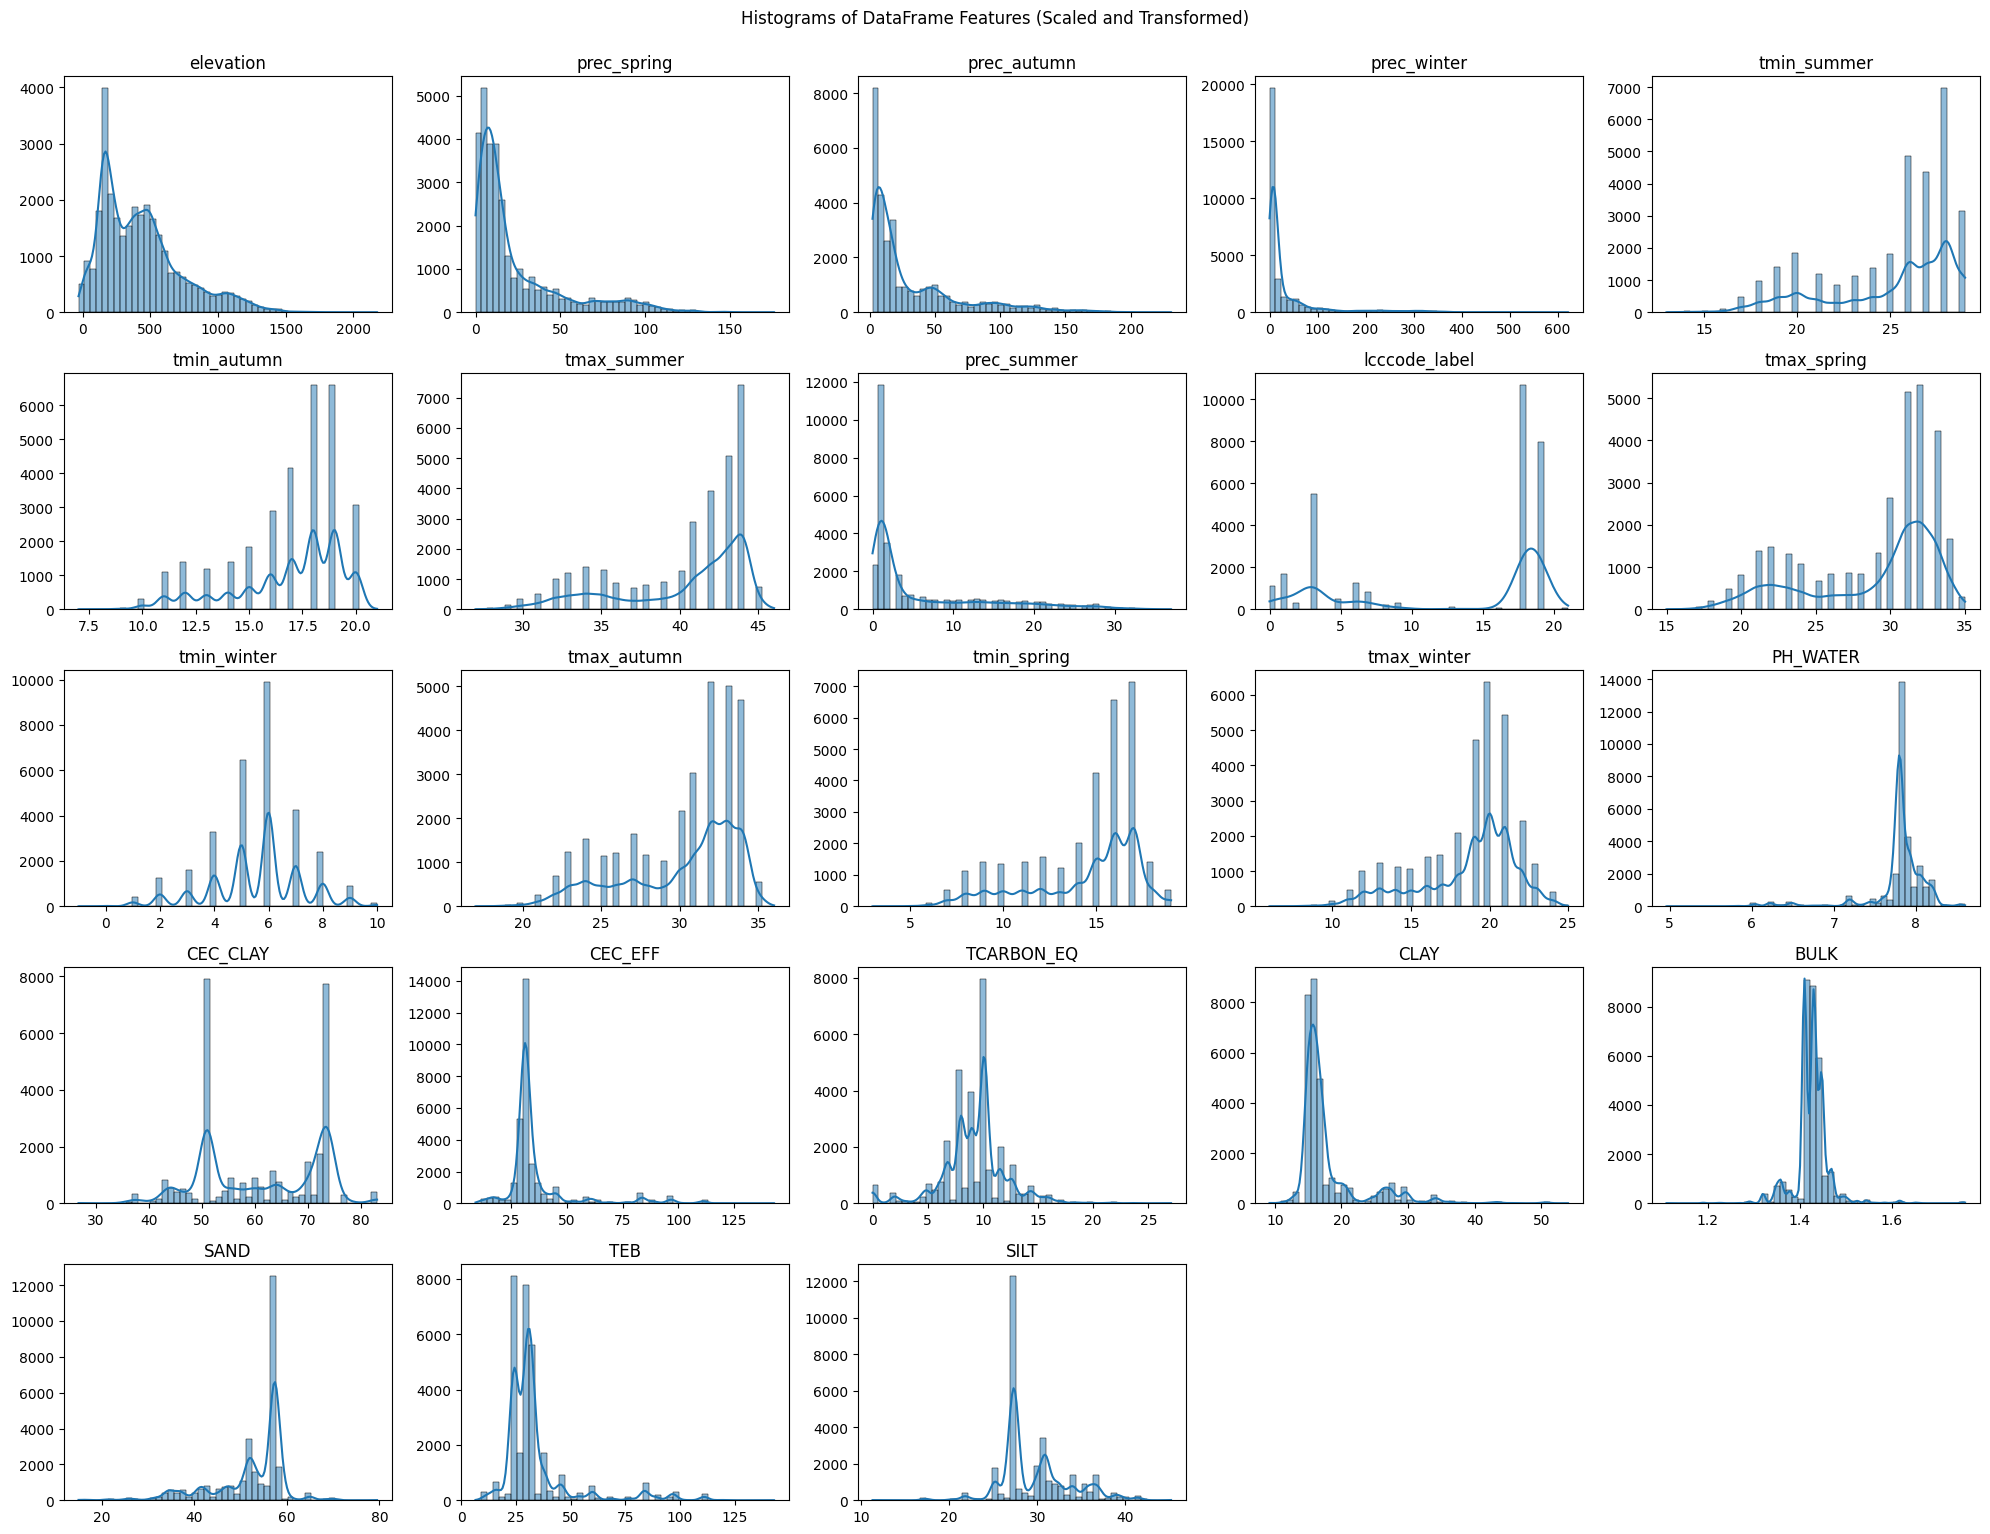

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all numerical columns from X_train_scaled, excluding the target variable 'fire'
numerical_cols_to_plot = X_train.select_dtypes(include=['float64', 'int64']).columns.drop('fire', errors='ignore')

# Calculate grid dimensions dynamically
num_plots = len(numerical_cols_to_plot)
num_cols = 5 # Maximum 5 columns for better readability
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(num_cols * 4, num_rows * 3))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X_train[col], kde=True, bins=50) # Explicitly setting bins to prevent ValueError
    plt.title(col)
    plt.xlabel('') # Clear x-axis label to avoid clutter in subplots
    plt.ylabel('') # Clear y-axis label
plt.tight_layout()
plt.suptitle('Histograms of DataFrame Features (Scaled and Transformed)', y=1.02) # Add a main title
plt.show()

#### box-cox transformation

#### prec transformation (yeo-jhonson transformation)

In [14]:
from sklearn.preprocessing import PowerTransformer

# Select precipitation columns
prec_cols = ['prec_autumn', 'prec_spring', 'prec_summer', 'prec_winter']

# Initialize Yeo-Johnson transformer
pt_yj = PowerTransformer(method='yeo-johnson', standardize=True)

# Fit and transform the precipitation columns
X_train[prec_cols] = pt_yj.fit_transform(X_train[prec_cols])

# Check transformed values
print(X_train[prec_cols].describe())


        prec_autumn   prec_spring   prec_summer   prec_winter
count  3.058300e+04  3.058300e+04  3.058300e+04  3.058300e+04
mean  -8.587012e-16  3.601155e-16 -1.304547e-16 -2.590508e-16
std    1.000016e+00  1.000016e+00  1.000016e+00  1.000016e+00
min   -1.850369e+00 -2.209013e+00 -1.827241e+00 -3.274681e+00
25%   -8.907013e-01 -6.281068e-01 -7.089803e-01 -5.395202e-01
50%    6.051583e-05 -8.531263e-02 -1.794823e-01 -1.778367e-01
75%    8.944424e-01  6.806316e-01  9.863235e-01  6.883305e-01
max    2.066566e+00  2.439218e+00  1.784524e+00  2.210854e+00


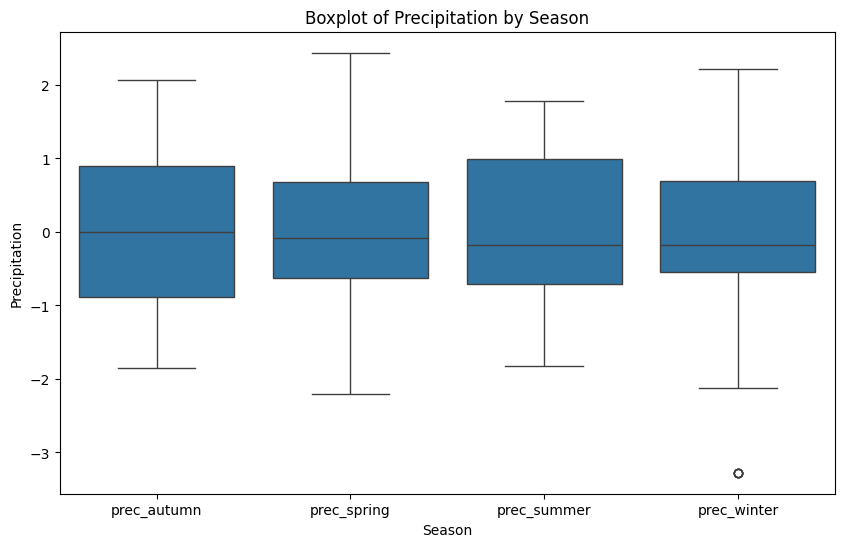

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select precipitation columns
prec_cols = ['prec_autumn', 'prec_spring', 'prec_summer', 'prec_winter']

# Melt the dataframe to long format for seaborn
prec_long = X_train[prec_cols].melt(var_name='Season', value_name='Precipitation')

# Plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Precipitation', data=prec_long)
plt.title('Boxplot of Precipitation by Season')
plt.ylabel('Precipitation')
plt.xlabel('Season')
plt.show()


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30583 entries, 1350628 to 182051
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      30583 non-null  float64
 1   prec_spring    30583 non-null  float64
 2   prec_autumn    30583 non-null  float64
 3   prec_winter    30583 non-null  float64
 4   tmin_summer    30583 non-null  int64  
 5   tmin_autumn    30583 non-null  int64  
 6   tmax_summer    30583 non-null  int64  
 7   prec_summer    30583 non-null  float64
 8   lcccode_label  30583 non-null  float64
 9   tmax_spring    30583 non-null  int64  
 10  tmin_winter    30583 non-null  int64  
 11  tmax_autumn    30583 non-null  int64  
 12  tmin_spring    30583 non-null  int64  
 13  tmax_winter    30583 non-null  int64  
 14  PH_WATER       30583 non-null  float64
 15  CEC_CLAY       30583 non-null  float64
 16  CEC_EFF        30583 non-null  float64
 17  TCARBON_EQ     30583 non-null  float64
 18  CLAY

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Select the specific transformed features for plotting
# selected_transformed_features = ['GYPSUM']

# # Plot histograms for each selected feature
# plt.figure(figsize=(15, 5))
# for i, col in enumerate(selected_transformed_features):
#     plt.subplot(1, 1, i + 1) # Adjust subplot grid for 3 plots
#     sns.histplot(X_train[col], kde=True)
#     plt.title(f'Histogram of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

In [ ]:
# from sklearn.preprocessing import PowerTransformer

# skewed_features = ['GYPSUM','BSAT','ORG_CARBON']

# pt_bc = PowerTransformer(method='yeo-johnson')  # or 'box-cox' if all positive
# X_train[skewed_features] = pt_bc.fit_transform(X_train[skewed_features])

# X_train['GYPSUM_yj']=pt_bc.fit_transform(X_train[['GYPSUM']])
# X_train['BSAT_yj']=pt_bc.fit_transform(X_train[['BSAT']])
# X_train['ORG_CARBON_yj']=pt_bc.fit_transform(X_train[['ORG_CARBON']])



#### cool and cold seasons for tmin and tmax

In [17]:
tmin_cols=['tmin_autumn','tmin_spring','tmin_summer','tmin_winter']
tmax_cols=['tmax_autumn','tmax_spring','tmax_summer','tmax_winter']
X_train['tmax_cool']=X_train[['tmax_summer','tmax_spring']].mean(axis=1)
X_train['tmax_cold']=X_train[['tmax_autumn','tmax_winter']].mean(axis=1)
X_train['tmin_cool']=X_train[['tmin_summer','tmin_spring']].mean(axis=1)
X_train['tmin_cold']=X_train[['tmin_autumn','tmin_winter']].mean(axis=1)
X_train=X_train.drop(columns=tmin_cols+tmax_cols)
X_train.head()

,elevation,prec_spring,prec_autumn,prec_winter,prec_summer,lcccode_label,PH_WATER,CEC_CLAY,CEC_EFF,TCARBON_EQ,CLAY,BULK,SAND,TEB,SILT,tmax_cool,tmax_cold,tmin_cool,tmin_cold
1350628,1201.0,0.433096,0.781556,0.713764,1.636007,18.0,8.18,69.8,45.0,12.56,17.0,1.428,50.6,45.0,32.4,29.5,19.0,15.5,7.0
883693,515.0,-0.628107,-0.185562,-0.707100,-0.179482,19.0,7.92,73.1,32.1,8.99,17.2,1.448,51.9,32.4,30.9,36.0,24.5,20.0,10.5
301422,411.0,-1.666883,-0.890701,-1.554486,0.149528,18.0,7.82,55.4,83.7,10.55,16.1,1.359,52.7,83.7,31.2,39.5,28.5,23.5,14.0
3890,167.0,-0.156635,-0.257746,-0.281027,-0.708980,3.0,7.80,51.0,31.5,10.10,15.0,1.410,57.5,24.0,27.5,38.0,26.5,23.0,12.5
1592604,997.0,0.826058,0.960935,0.919028,1.597282,7.0,7.61,44.1,32.6,6.86,26.3,1.447,37.0,29.6,36.7,28.0,18.5,13.5,7.5


#### Standard Scaler for the remaining features:

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30583 entries, 1350628 to 182051
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      30583 non-null  float64
 1   prec_spring    30583 non-null  float64
 2   prec_autumn    30583 non-null  float64
 3   prec_winter    30583 non-null  float64
 4   prec_summer    30583 non-null  float64
 5   lcccode_label  30583 non-null  float64
 6   PH_WATER       30583 non-null  float64
 7   CEC_CLAY       30583 non-null  float64
 8   CEC_EFF        30583 non-null  float64
 9   TCARBON_EQ     30583 non-null  float64
 10  CLAY           30583 non-null  float64
 11  BULK           30583 non-null  float64
 12  SAND           30583 non-null  float64
 13  TEB            30583 non-null  float64
 14  SILT           30583 non-null  float64
 15  tmax_cool      30583 non-null  float64
 16  tmax_cold      30583 non-null  float64
 17  tmin_cool      30583 non-null  float64
 18  tmin

In [19]:
from sklearn.preprocessing import StandardScaler

# numeric features to scale
num_features = ['elevation','SILT','SAND','BULK','TCARBON_EQ','BULK','CLAY','PH_WATER','CEC_CLAY','CEC_EFF','tmin_cold','tmax_cold','tmin_cool','tmax_cool']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[num_features] = scaler.fit_transform(X_train_scaled[num_features])


In [20]:
X_train=X_train_scaled

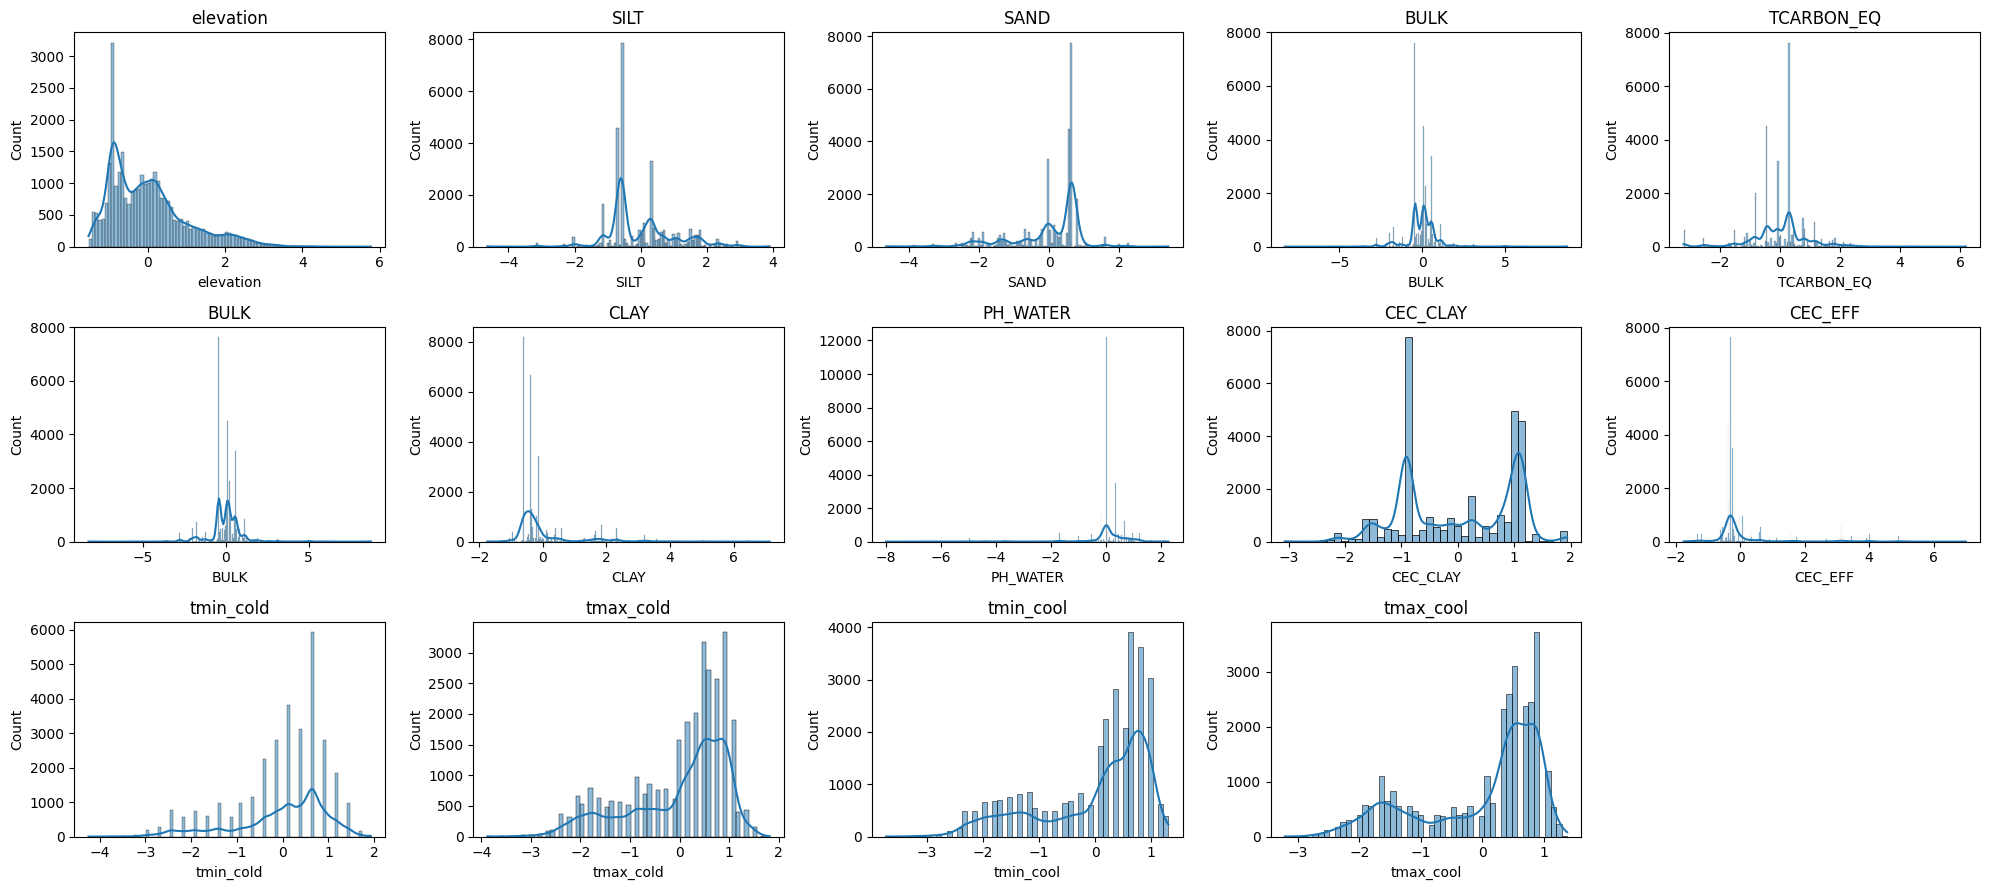

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get the list of numerical features from the 'num_features' variable
# The num_features variable is already defined in the kernel state

# Calculate grid dimensions dynamically
num_plots = len(num_features)
num_cols = 5 # Maximum 5 columns for better readability
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(num_cols * 4, num_rows * 3))
for i, col in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X_train_scaled[col], kde=True) # Assuming X_train_scaled is the dataframe with scaled features
    plt.title(col)
    plt.tight_layout()
plt.show()

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30583 entries, 653973 to 483859
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      30583 non-null  float64
 1   prec_spring    30583 non-null  float64
 2   prec_autumn    30583 non-null  float64
 3   prec_winter    30583 non-null  float64
 4   prec_summer    30583 non-null  float64
 5   lcccode_label  30583 non-null  float64
 6   CEC_CLAY       30583 non-null  float64
 7   CEC_EFF        30583 non-null  float64
 8   PH_WATER       30583 non-null  float64
 9   TCARBON_EQ     30583 non-null  float64
 10  BULK           30583 non-null  float64
 11  SILT           30583 non-null  float64
 12  CLAY           30583 non-null  float64
 13  TOTAL_N        30583 non-null  float64
 14  TEB            30583 non-null  float64
 15  tmax_cool      30583 non-null  float64
 16  tmax_cold      30583 non-null  float64
 17  tmin_cool      30583 non-null  float64
 18  tmin_

### feature Extraction

#### extract strongly correlated features

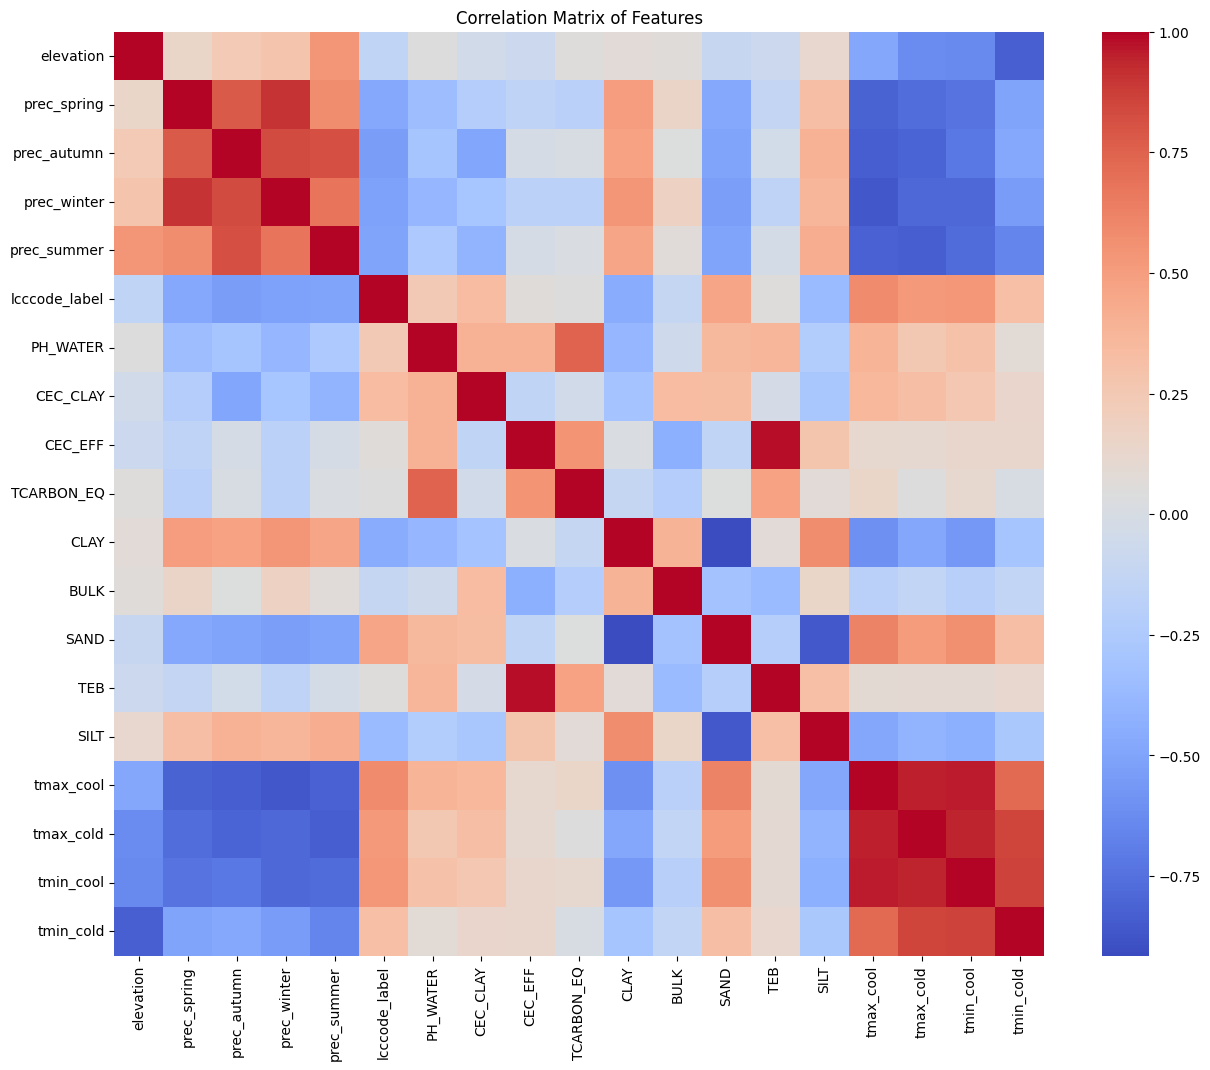

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric features for correlation
# Exclude target 'fire'
numeric_features =X_train

# Calculate correlation matrix
corr_matrix = numeric_features.corr()

# Plot correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [23]:
import pandas as pd
import numpy as np
# Set correlation threshold
threshold = 0.95

# Select upper triangle of correlation matrix (to avoid duplicates)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
strong_corr_pairs = [(col, row, upper.loc[row, col])
                     for col in upper.columns
                     for row in upper.index
                     if (upper.loc[row, col] > threshold)]

# Convert to DataFrame for easier visualization
strong_corr_df = pd.DataFrame(strong_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])

print(strong_corr_df)


   Feature_1  Feature_2  Correlation
0        TEB    CEC_EFF     0.980860
1  tmin_cool  tmax_cool     0.955224


#### pca between tmin and tmax

In [24]:
from sklearn.decomposition import PCA
import pandas as pd

temp_features = X_train[['tmax_cool','tmin_cool']]
pca = PCA(n_components=0.95)
temp_pca = pca.fit_transform(temp_features)
print("Number of components:", pca.n_components_)
print("Explained variance:", pca.explained_variance_ratio_)


Number of components: 1
Explained variance: [0.97761213]


In [25]:
X_train['temp_PC']=temp_pca[:,0]
X_train=X_train.drop(columns=['tmax_cool','tmin_cool'])

#### for ref_bulk and clay

In [17]:
ref_bulk_clay_features = X_train[['REF_BULK','CLAY']]
pca_clay=PCA(n_components=0.95)
clay_pc=pca_clay.fit_transform(ref_bulk_clay_features)
print("Number of components:", pca_clay.n_components_)
print("Explained variance:", pca_clay.explained_variance_ratio_)
X_train['clay_PC1']=clay_pc[:,0]
X_train=X_train.drop(columns=['REF_BULK','CLAY'])

Number of components: 1
Explained variance: [0.9999911]


#### for TEB and cec_EFF

In [26]:
ref_TEB_EFF_features = X_train[['TEB','CEC_EFF']]
pca_TEB=PCA(n_components=0.95)
TEB_pc=pca_TEB.fit_transform(ref_TEB_EFF_features)
print("Number of components:", pca_TEB.n_components_)
print("Explained variance:", pca_TEB.explained_variance_ratio_)
X_train['TEB_PC1']=TEB_pc[:,0]
X_train=X_train.drop(columns=['TEB','CEC_EFF'])

Number of components: 1
Explained variance: [0.99985643]


In [27]:
X_train.head()

,elevation,prec_spring,prec_autumn,prec_winter,prec_summer,lcccode_label,PH_WATER,CEC_CLAY,TCARBON_EQ,CLAY,BULK,SAND,SILT,tmax_cold,tmin_cold,temp_PC,TEB_PC1
1350628,2.543085,0.433096,0.781556,0.713764,1.636007,18.0,1.083631,0.761786,1.155001,-0.202171,0.045307,-0.208640,0.678919,-1.631986,-2.187388,-1.825009,11.486111
883693,0.272295,-0.628107,-0.185562,-0.707100,-0.179482,19.0,0.351683,1.055649,-0.083800,-0.162511,0.570362,-0.046481,0.300645,0.017029,-0.386817,0.260860,-1.141786
301422,-0.071964,-1.666883,-0.890701,-1.554486,0.149528,18.0,0.070164,-0.520527,0.457524,-0.380637,-1.766138,0.053309,0.376300,1.216312,1.413755,1.624061,50.268157
3890,-0.879650,-0.156635,-0.257746,-0.281027,-0.708980,3.0,0.013860,-0.912345,0.301373,-0.598762,-0.427244,0.652050,-0.556776,0.616670,0.642081,1.262726,-9.528779
1592604,1.867806,0.826058,0.960935,0.919028,1.597282,7.0,-0.521026,-1.526786,-0.822917,1.641981,0.544111,-1.905073,1.763305,-1.781896,-1.930163,-2.520685,-3.934685


## Feature engineering (for test data)

### feature selection

In [28]:
X_test=X_test[selected]

In [30]:
X_test=X_test.drop(columns=['longitude','latitude'])

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7646 entries, 521012 to 1668891
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      7646 non-null   float64
 1   prec_spring    7646 non-null   int64  
 2   prec_autumn    7646 non-null   int64  
 3   prec_winter    7646 non-null   int64  
 4   tmin_summer    7646 non-null   int64  
 5   tmin_autumn    7646 non-null   int64  
 6   tmax_summer    7646 non-null   int64  
 7   prec_summer    7646 non-null   int64  
 8   lcccode_label  7646 non-null   float64
 9   tmax_spring    7646 non-null   int64  
 10  tmin_winter    7646 non-null   int64  
 11  tmax_autumn    7646 non-null   int64  
 12  tmin_spring    7646 non-null   int64  
 13  tmax_winter    7646 non-null   int64  
 14  PH_WATER       7646 non-null   float64
 15  CEC_CLAY       7646 non-null   float64
 16  CEC_EFF        7646 non-null   float64
 17  TCARBON_EQ     7646 non-null   float64
 18  CLAY 

### feature scaling

In [ ]:
# X_test[skewed_features]=pt_bc.transform(X_test[skewed_features])


In [33]:
tmin_cols=['tmin_autumn','tmin_spring','tmin_summer','tmin_winter']
tmax_cols=['tmax_autumn','tmax_spring','tmax_summer','tmax_winter']
X_test['tmax_cool']=X_test[['tmax_summer','tmax_spring']].mean(axis=1)
X_test['tmax_cold']=X_test[['tmax_autumn','tmax_winter']].mean(axis=1)
X_test['tmin_cool']=X_test[['tmin_summer','tmin_spring']].mean(axis=1)
X_test['tmin_cold']=X_test[['tmin_autumn','tmin_winter']].mean(axis=1)
X_test=X_test.drop(columns=tmin_cols+tmax_cols)
X_test.head()

,elevation,prec_spring,prec_autumn,prec_winter,prec_summer,lcccode_label,PH_WATER,CEC_CLAY,CEC_EFF,TCARBON_EQ,CLAY,BULK,SAND,TEB,SILT,tmax_cool,tmax_cold,tmin_cool,tmin_cold
521012,516.0,3,7,4,3,18.0,7.80,51.0,31.5,10.10,15.0,1.410,57.5,24.0,27.5,38.0,27.5,22.5,13.0
1765584,621.0,54,61,110,11,6.0,7.44,45.0,30.2,5.88,27.4,1.452,36.2,28.0,36.4,28.5,20.0,14.5,8.5
333813,300.0,1,3,1,1,3.0,8.20,71.0,37.0,11.30,20.0,1.490,40.0,38.0,40.0,39.0,28.0,22.0,12.5
115961,468.0,5,3,7,1,18.0,7.73,71.9,30.5,6.87,16.1,1.435,58.7,30.4,25.2,37.0,27.0,21.0,11.5
349164,470.0,1,19,10,2,18.0,7.80,51.0,31.5,10.10,15.0,1.410,57.5,24.0,27.5,38.0,28.0,23.0,14.0


In [34]:
X_test[num_features]=scaler.transform(X_test[num_features])

In [35]:
X_test.head()

,elevation,prec_spring,prec_autumn,prec_winter,prec_summer,lcccode_label,PH_WATER,CEC_CLAY,CEC_EFF,TCARBON_EQ,CLAY,BULK,SAND,TEB,SILT,tmax_cool,tmax_cold,tmin_cool,tmin_cold
521012,0.275605,3,7,4,3,18.0,0.013860,-0.912345,-0.283375,0.301373,-0.598762,-0.427244,0.652050,24.0,-0.556776,0.791707,0.916491,0.836448,0.899306
1765584,0.623175,54,61,110,11,6.0,-0.999607,-1.446642,-0.368293,-1.162980,1.860107,0.675376,-2.004863,28.0,1.687650,-1.446454,-1.332165,-1.685315,-1.415714
333813,-0.439395,1,3,1,1,3.0,1.139934,0.868645,0.075891,0.717777,0.392717,1.672984,-1.530860,38.0,2.595508,1.027303,1.066402,0.678838,0.642081
115961,0.116716,5,3,7,1,18.0,-0.183203,0.948790,-0.348696,-0.819447,-0.380637,0.229076,0.801735,30.4,-1.136796,0.556111,0.766581,0.363617,0.127632
349164,0.123337,1,19,10,2,18.0,0.013860,-0.912345,-0.283375,0.301373,-0.598762,-0.427244,0.652050,24.0,-0.556776,0.791707,1.066402,0.994058,1.413755


### feature extraction

In [36]:
X_test[prec_cols] = pt_yj.transform(X_test[prec_cols])


In [37]:
temp_features_t=X_test[['tmax_cool','tmin_cool']]
temp_pca_t=pca.transform(temp_features_t)
X_test['temp_PC']= temp_pca_t[:,0]



In [42]:
X_test=X_test.drop(columns=['tmax_cool','tmin_cool'])

In [30]:
clay_pc_t=pca_clay.transform(X_test[['REF_BULK','CLAY']])
X_test['clay_PC1']=clay_pc_t[:,0]


In [31]:
X_test=X_test.drop(columns=['REF_BULK','CLAY'])

In [38]:
TEB_pc_t=pca_TEB.transform(X_test[['TEB','CEC_EFF']])
X_test['TEB_PC1']=TEB_pc_t[:,0]

In [39]:
X_test=X_test.drop(columns=['TEB','CEC_EFF'])

In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7646 entries, 521012 to 1668891
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      7646 non-null   float64
 1   prec_spring    7646 non-null   float64
 2   prec_autumn    7646 non-null   float64
 3   prec_winter    7646 non-null   float64
 4   prec_summer    7646 non-null   float64
 5   lcccode_label  7646 non-null   float64
 6   PH_WATER       7646 non-null   float64
 7   CEC_CLAY       7646 non-null   float64
 8   TCARBON_EQ     7646 non-null   float64
 9   CLAY           7646 non-null   float64
 10  BULK           7646 non-null   float64
 11  SAND           7646 non-null   float64
 12  SILT           7646 non-null   float64
 13  tmax_cold      7646 non-null   float64
 14  tmin_cold      7646 non-null   float64
 15  temp_PC        7646 non-null   float64
 16  TEB_PC1        7646 non-null   float64
dtypes: float64(17)
memory usage: 1.1 MB


## Oversampling fire instances

### Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampling_strategy = 0.6
ros = RandomOverSampler(sampling_strategy=over_sampling_strategy)
X_res_o, y_res_o = ros.fit_resample(X_res, y_res)
ax=y_res_o.value_counts().plot.pie()
_ = ax.set_title("Random Over-sampling")
X_res_o.shape, y_res_o.shape, y_res_o.sum()

In [ ]:
#save in df_balanced_or
df_balanced_or = pd.concat([X_res_o, y_res_o], axis=1)

###  smote

((40806, 17), (40806,), np.int64(20403))

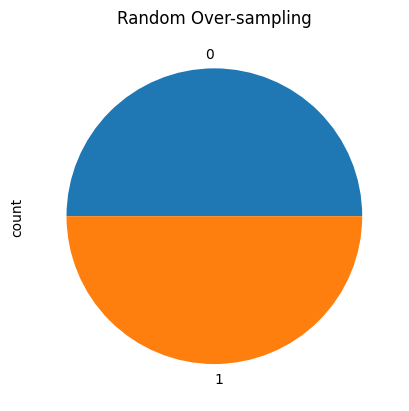

In [44]:
from imblearn.over_sampling import SMOTE
rosks =SMOTE(random_state=42)
X_res_oks, y_res_oks = rosks.fit_resample(X_train, y_train)
ax=y_res_oks.value_counts().plot.pie()
_ = ax.set_title("Random Over-sampling")
X_res_oks.shape, y_res_oks.shape, y_res_oks.sum()

In [45]:
test = pd.concat([X_res_oks, y_res_oks], axis=1)
test['fire'].value_counts()

,count
fire,
0,20403
1,20403


In [46]:
X_train=X_res_oks
y_train=y_res_oks

In [ ]:
#save in df_balanced_os
df_balanced_os = pd.concat([X_res_oks, y_res_oks], axis=1)
df_balanced_os['fire'].value_counts()
X=df_balanced_os.drop(columns=['fire'])
y=df_balanced_os['fire']

### KmeansSMOTE

In [ ]:
X_train=X_train.drop(columns=['fire'])

In [ ]:
X_train.info()

In [ ]:
from imblearn.over_sampling import KMeansSMOTE
rosks =KMeansSMOTE(sampling_strategy=0.5,cluster_balance_threshold=0.01)
X_res_o, y_res_o = rosks.fit_resample(X_train, y_train)
ax=y_res_o.value_counts().plot.pie()
_ = ax.set_title("KMeansSMOTE Over-sampling")
X_res_o.shape, y_res_o.shape, y_res_o.sum()

In [ ]:
balanced=pd.concat([X_res_o,y_res_o],axis=1)
balanced['fire'].value_counts()

## Combination between Undersampling and Oversampling

#### SMOTE + TOMEK

In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy=0.3)
X_res_ou, y_res_ou = smote_tomek.fit_resample(X_train, y_train)
ax=y_res_ou.value_counts().plot.pie()
_ = ax.set_title("Combination SMOTE+TOMEK")
X_res_ou.shape, y_res_ou.shape, y_res_ou.sum()


## Supervised models


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



### KNN

In [48]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [49]:
grid_search = GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid=param_grid_knn,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        n_jobs=-1,  # Use all available cores
        verbose=1
    )

In [50]:
 # Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [51]:
# Best parameters
print(f"\nBest Parameters for KNN:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"Cross-Validation Score (Mean): {grid_search.best_score_:.4f}")



Best Parameters for KNN:
  metric: manhattan
  n_neighbors: 3
  weights: distance
Cross-Validation Score (Mean): 0.9448


In [52]:
# Get the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print("CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5083
           1       0.87      0.92      0.89      2563

    accuracy                           0.93      7646
   macro avg       0.91      0.92      0.92      7646
weighted avg       0.93      0.93      0.93      7646

